# ------------------------------------------------------ Linear regression with one variable

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading data, along with os module - for system path specifying

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

## ***Exercise 1:***

#### Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## ***Exercise 2:***

#### Plot and analyze the data, where: x - population, y - profit.

Text(0.5, 0, 'Population')

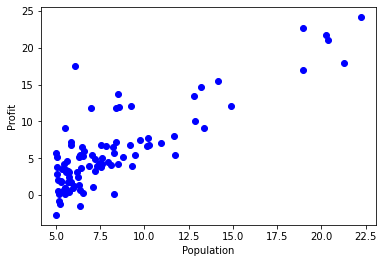

In [5]:
plt.plot(data['Population'], data['Profit'], 'bo')
plt.ylabel('Profit')
plt.xlabel('Population')

## ***Exercise 3:***

#### In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [6]:
data.describe().loc['count', 'Population'] 

97.0

In [7]:
data['One_column'] = 1

In [8]:
data

,Population,Profit,One_column
0,6.1101,17.59200,1
1,5.5277,9.13020,1
2,8.5186,13.66200,1
3,7.0032,11.85400,1
4,5.8598,6.82330,1
...,...,...,...
92,5.8707,7.20290,1
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1


## ***Exercise 4:***

#### We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [9]:
X = pd.DataFrame(data['Population'])
col=pd.DataFrame(np.ones((97,1)))
data.insert(0,'Ones',col)
X=data[['Ones','Population']]

In [10]:
X

,Ones,Population
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
...,...,...
92,1.0,5.8707
93,1.0,5.3054
94,1.0,8.2934
95,1.0,13.3940


In [11]:
Y = pd.DataFrame(data['Profit'])

In [12]:
Y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


##### Finally, we’re going to convert our data frames to numpy matrices and instantiate a parameter matirx. We also need to initialise parameter θ. 

In [13]:
#X.values

In [14]:
#Y.values

In [15]:
theta_matrix = np.matrix(np.array([0,0]))
X_matrix = np.matrix(X.values)
Y_matrix = np.matrix(Y.values)


In [16]:
#theta_matrix

In [17]:
#X_matrix

In [18]:
#Y_matrix

## ***Exercise 5:***

#### The goal of linear regression is to find a straight line which accurately represents the relationship between population and profit. This is called the hypothesis function and it’s formulated as 𝑓(𝑥)→𝐑: 

$$J(\theta) = \frac{1}{2m} \sum^{m}_{i=1}(f(x^i)- y^i)^2$$

Where $f(x^i)$ is the *hypothesis function* at a given point $x^i$, and $y^i$ is the actual value from the dataset.

A General formula of a *hypothesis function* is as follows:

$$f(x) = \theta_0 + \theta_1  x_1 + \theta_2 x_2 + ... \theta_n x_n$$

$\theta$ is the **vector of model parameters**.

$m$ is the **amount of considered points**

$x$ corresponds to a **feature matrix**

## ***Exercise 6:***

####  The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point.

#### Please write the cost function based on X,y and parameter θ.

In [19]:
def computeCostFunction(X,Y,theta,m=0):
    """J(\theta)
    X - np.matrix vector
    y - np.matrix vector
    theta - model parameters 
    """
    if m == 0:
        m = len(X)
    return 1/(2*m)*sum((np.power((X@theta.T-Y), 2)))

# Exercise 7 (Gradient descend method)

### Test the cost function with (θ=0). 

**Output: 32.07 (may differ…)**

In [20]:
theta_matrix = np.matrix(np.array([0,0]))

In [21]:
computeCostFunction(X_matrix, Y_matrix, theta_matrix)

matrix([[32.07273388]])

# Exercise 8

### Please implement the gradient descent algorithm:

Gradient descent method

Since our hypothesis is based on the model parameters θ, we must somehow adjust them to minimize our cost function $J(\theta)$: 

In [22]:
theta_matrix = np.matrix(np.array([0,0]))

In [23]:
alpha=0.01
it=1000

In [24]:
def Gradient_descent(X,Y,theta,alpha,it,m=0):
    """ 
    
    """
    if m == 0:
        m = len(X) 
    theta_1=theta
    costs=np.zeros(shape=(it,1)) #Init the costs matrix
    for i in range(it):
        theta_1=theta_1-alpha*sum((X@theta_1.T-Y).T*X)/len(X)
        costs[i]=computeCostFunction(X,Y,theta_1)
    return (theta_1, computeCostFunction(X,Y,theta_1,Y.shape[0]), costs)

In [25]:
theta_optimal,cost_optimal,costs = Gradient_descent(X_matrix, Y_matrix, theta_matrix, alpha, it)

# Exercise 9

### Please calculate the optimal parameters for the dataset.

### Optimal theta values:

In [26]:
print(theta_optimal) #[[slope, intercept]]

[[-3.24140214  1.1272942 ]]


# Exercise 10

### Please calculate the cost function for the given (zad.8) θ.

### Optimal cost for obtained parameters:

In [27]:
print(cost_optimal) # Sum of squared residuals

[[4.5159555]]


### Iteration values:

In [28]:
print(costs)

[[6.73719046]
 [5.93159357]
 [5.90115471]
 [5.89522859]
 [5.89009494]
 [5.88500416]
 [5.87993248]
 [5.87487909]
 [5.86984391]
 [5.86482687]
 [5.85982789]
 [5.85484692]
 [5.84988389]
 [5.84493874]
 [5.8400114 ]
 [5.83510181]
 [5.8302099 ]
 [5.82533562]
 [5.82047889]
 [5.81563965]
 [5.81081784]
 [5.8060134 ]
 [5.80122627]
 [5.79645638]
 [5.79170367]
 [5.78696808]
 [5.78224955]
 [5.77754801]
 [5.77286341]
 [5.76819568]
 [5.76354477]
 [5.75891061]
 [5.75429313]
 [5.7496923 ]
 [5.74510803]
 [5.74054027]
 [5.73598897]
 [5.73145406]
 [5.72693549]
 [5.72243319]
 [5.71794711]
 [5.71347718]
 [5.70902336]
 [5.70458558]
 [5.70016379]
 [5.69575792]
 [5.69136792]
 [5.68699373]
 [5.6826353 ]
 [5.67829257]
 [5.67396548]
 [5.66965398]
 [5.665358  ]
 [5.6610775 ]
 [5.65681242]
 [5.6525627 ]
 [5.64832829]
 [5.64410913]
 [5.63990517]
 [5.63571635]
 [5.63154261]
 [5.62738391]
 [5.6232402 ]
 [5.6191114 ]
 [5.61499748]
 [5.61089837]
 [5.60681403]
 [5.60274441]
 [5.59868944]
 [5.59464907]
 [5.59062326]
 [5.58

# Exercise 11

### Plot the regression function and our dataset.

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


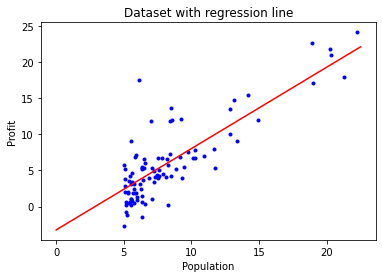

In [29]:
plt.figure()
plt.title('Dataset with regression line')
plt.xlabel('Population')
plt.ylabel('Profit')
x_1=0
x_2=22.5
y_1=float(theta_optimal[:,0])+x_1*float(theta_optimal[:,1])
y_2=float(theta_optimal[:,0])+x_2*theta_optimal[:,1]
plt.plot(X_matrix[:,1],Y_matrix[:,0],'b.')
plt.plot([x_1,x_2],[y_1,y_2],'r')
plt.show()

# Exercise 12

### Plot the relationship between the cost function and number of iterations.

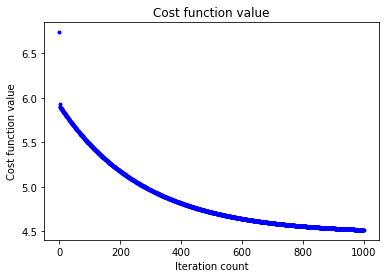

In [30]:
plt.figure()
plt.title('Cost function value')
plt.xlabel('Iteration count')
plt.ylabel('Cost function value')
plt.plot(range(len(costs)),costs,'b.')

# -------------------------------------------- Linear regression with multiple variables

#### To implement the linear regression algorithm for multiple variables we will use the housing database. 

We're given both the size of the house in square feet, and the number of bedrooms in the house.
Previously implemented functions will be used to complete also this task. If implemented correctly - in the vectorized version - they will also work for this example.
Read the data:

### Loading used packages:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

In [32]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
type(data2)
#data2.head()

pandas.core.frame.DataFrame

# Example 1:

Notice that the scale of the values for each variable is vastly different. 

A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called **“feature normalization”.** 

One way to do this is by **subtracting from each value** in a **feature** the **mean of that feature**, and then **dividing by the standard deviation** (2 lines of code).

In [33]:
def standarize(X):
    mean = X.mean()
    std = X.std()
    X = (X - mean) / std
    return X

In [34]:
data2_stdrized = pd.DataFrame(index=[], columns=['Size', 'Bedrooms', 'Price']) # init an empty pandas dataframe

data2_stdrized['Size']=standarize(data2['Size'])
data2_stdrized['Bedrooms']=standarize(data2['Bedrooms'])
data2_stdrized['Price']=standarize(data2['Price'])

In [35]:
data2_stdrized.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [36]:
col_h=pd.DataFrame(np.ones((data2_stdrized.shape[0],1)))
data2_stdrized.insert(0,'Ones',col_h)
X_h=data2_stdrized[['Ones','Size','Bedrooms']]
Y_h=data2_stdrized[['Price']]

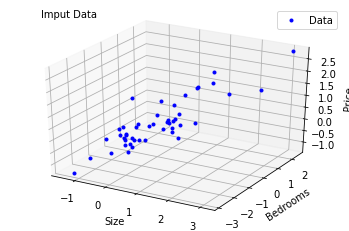

In [37]:
plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X_h['Size'],X_h['Bedrooms'],Y_h['Price'], 'b.',label='Data')
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.text2D(0.1, 0.95, "Imput Data", transform=ax.transAxes)
ax.set_zlabel('Price')
plt.show()

In [38]:
def Gradient_descent_h(X,Y,theta,alpha,it,m=0):
    theta_1 = theta
    costs = np.zeros(shape=(it, 1))
    for i in range(it):
        theta_1 = theta_1 - alpha * sum((X @ theta_1.T - Y) * X) / len(X)
        costs[i] = computeCostFunction(X, Y, theta_1, Y.shape[0])
    return theta_1, computeCostFunction(X, Y, theta_1, Y.shape[0]), costs

In [39]:
theta_h=np.array([[0.0,0.0,0.0]],dtype=float)
X_h_matrix=np.array(X_h.values,dtype=float)
Y_h_matrix=np.array(Y_h.values,dtype=float)
alpha=0.01
it=1000
print("Cost function value: ")
print(computeCostFunction(X_h_matrix,Y_h_matrix,theta_h,Y_h_matrix.shape[0])) 
theta_optimal_h,cost_optimal_h,costs_h=Gradient_descent_h(X_h_matrix,Y_h_matrix,theta_h,alpha,it,Y_h_matrix.shape[0])
print("Optimal theta Vector Values: ")
print(theta_optimal_h) # optymalna theta=[-1.10e-16,8.79e-1,-4.691e-2]
print("Optimal Cost Vector Values: ")
print(cost_optimal_h) # Koszt dla optymalnego theta=0.131

Cost function value: 
[0.4893617]
Optimal theta Vector Values: 
[[-1.03374756e-16  8.78503652e-01 -4.69166570e-02]]
Optimal Cost Vector Values: 
[0.13070337]


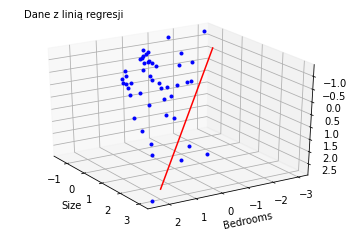

In [40]:
plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X_h_matrix[:,1],X_h_matrix[:,2],Y_h_matrix[:,0], 'b.')
ax.text2D(0.05, 0.95, "Dane z linią regresji", transform=ax.transAxes)
x1_1=-1
x1_2=3
x2_1=-3
x2_2=2
y_1=theta_optimal_h[:,0]+x1_1*theta_optimal_h[:,1]+x2_1*theta_optimal_h[:,2]
y_2=theta_optimal_h[:,0]+x1_2*theta_optimal_h[:,1]+x2_2*theta_optimal_h[:,2]
ax.plot3D([x1_1,x1_2],[x2_1,x2_2],[y_1[0],y_2[0]],'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(elev=-153, azim=-148)
plt.show()

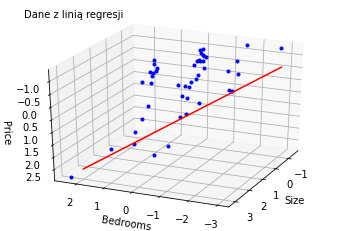

In [41]:
plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X_h_matrix[:,1],X_h_matrix[:,2],Y_h_matrix[:,0], 'b.')
ax.text2D(0.05, 0.95, "Dane z linią regresji", transform=ax.transAxes)
x1_1=-1
x1_2=3
x2_1=-3
x2_2=2
y_1=theta_optimal_h[:,0]+x1_1*theta_optimal_h[:,1]+x2_1*theta_optimal_h[:,2]
y_2=theta_optimal_h[:,0]+x1_2*theta_optimal_h[:,1]+x2_2*theta_optimal_h[:,2]
ax.plot3D([x1_1,x1_2],[x2_1,x2_2],[y_1[0],y_2[0]],'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(elev=-153, azim=156)
plt.show()

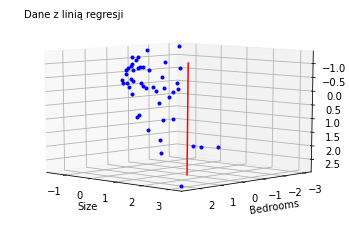

In [42]:
plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X_h_matrix[:,1],X_h_matrix[:,2],Y_h_matrix[:,0], 'b.')
ax.text2D(0.05, 0.95, "Dane z linią regresji", transform=ax.transAxes)
x1_1=-1
x1_2=3
x2_1=-3
x2_2=2
y_1=theta_optimal_h[:,0]+x1_1*theta_optimal_h[:,1]+x2_1*theta_optimal_h[:,2]
y_2=theta_optimal_h[:,0]+x1_2*theta_optimal_h[:,1]+x2_2*theta_optimal_h[:,2]
ax.plot3D([x1_1,x1_2],[x2_1,x2_2],[y_1[0],y_2[0]],'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(elev=-171, azim=-134)
plt.show()

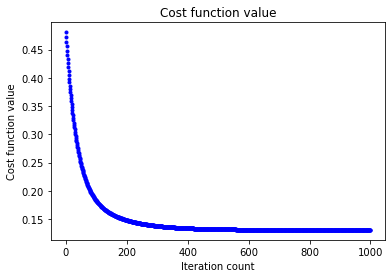

In [43]:
plt.figure()
plt.title('Cost function value')
plt.xlabel('Iteration count')
plt.ylabel('Cost function value')
plt.plot(range(len(costs_h)),costs_h,'b.')

# ------------------------ Linear regression - Python

An alternative solution to explicit implementation of the linear regression problem is to use the library `scikit-learn` with the object `LinearRegression`.

The implementation of any type of regression is very simple, we create an object of the appropriate class (`LinearRegression, Ridge, Lasso, ElasticNet`), on which we call the **fit** method, giving it the **training set arguments**, target values and possible parameters `(𝛼,𝜌)`. Then we call **predict**, which will return the predicted value. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [45]:
def standarize(X):
    mean = X.mean()
    std = X.std()
    X = (X - mean) / std
    return X

In [46]:
boston=datasets.load_boston()
# print(boston.DESCR)
boston_X=boston.data
boston_Y=boston.target
point=int(0.7*boston_X.shape[0])
X_train=boston_X[:point]
Y_train=boston_Y[:point]
X_test=boston_X[point:]
Y_test=boston_Y[point:]

In [47]:
len(boston_X)

506

### Defining an object instance:

In [48]:
regr = linear_model.LinearRegression()

### Learning based on a training data:

In [49]:
regr.fit(X_train, Y_train)

LinearRegression()

### Predicting the value for the test data

In [50]:
Y_predicted = regr.predict(X_test)

### Regression line parameters:

In [51]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.29693856  0.01469497  0.04050457  0.79060732 -9.12933243  9.24839787
 -0.0451214  -0.91395374  0.14079658 -0.01477291 -0.63369567  0.01577172
 -0.09514128]


### Mean-square error value (Linear Regression)

In [52]:
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares for Linear Regression: {}".format(error))

Residual sum of squares for Linear Regression: 546.9193565310729


### Mean-square error value (Lasso)

In [53]:
regr = linear_model.Lasso(alpha=5.1)
regr.fit(X_train, Y_train)
Y_predicted = regr.predict(X_test)
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares for Lasso: {}".format(error))

Residual sum of squares for Lasso: 61.057909757514366


In [54]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.          0.0477903  -0.          0.          0.          0.
  0.04708948 -0.          0.         -0.02068316 -0.0529224   0.00708213
 -0.78690159]


### Mean-square error value (ElasticNet)

In [55]:
regr = linear_model.ElasticNet(alpha=0.5,l1_ratio=0.5)
regr.fit(X_train, Y_train)
Y_predicted = regr.predict(X_test)
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares for ElasticNet: {}".format(error))

Residual sum of squares for ElasticNet: 47.06479903917339


In [56]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.00000000e+00  4.14236725e-02 -2.83518700e-03  0.00000000e+00
 -0.00000000e+00  3.60073049e+00  8.54424570e-04 -8.64658658e-01
  2.31300264e-01 -1.96056131e-02 -7.77811752e-01  1.57976950e-02
 -5.63953800e-01]


#### The least error made by fitting into the data was achieved using ElasticNet method. The worst method is the Linear Regression

**Linear_Regression:** 546.9193565310729

**Lasso:** 61.057909757514366

**ElasticNet:** 47.06479903917339